#***Retail Sales Performance Dashboard***

# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from google.colab import files


# Upload the Dataset

In [2]:
uploaded = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore.csv


# Load the CSV into a DataFrame

In [3]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')


# Preview the Data

In [4]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Cleaning & Preparation

In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fix data types
df['Order Date'] = pd.to_datetime(df['Order Date'])



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


# Handle Missing Values

In [6]:
df.dropna(inplace=True)


#Exploratory Data Analysis (EDA)

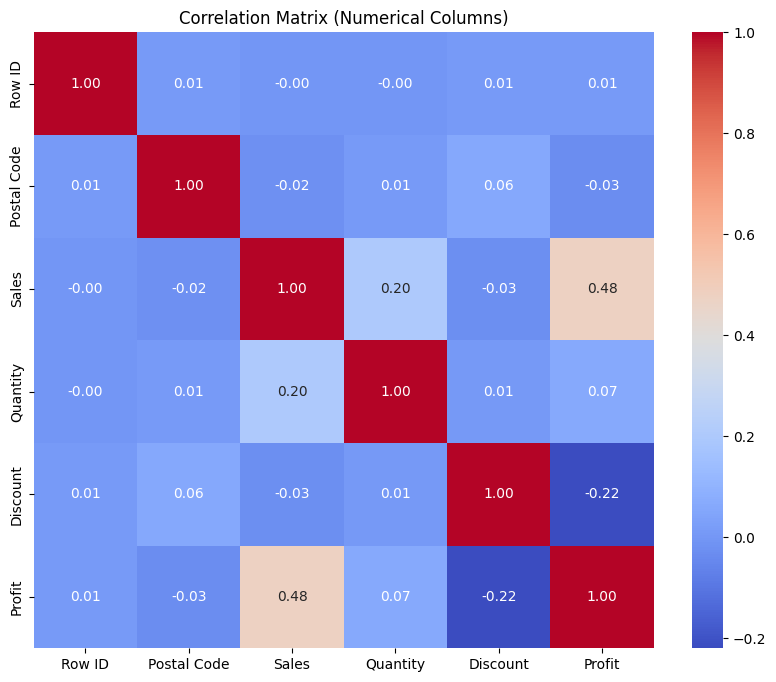

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is pandas DataFrame loaded from the CSV
# and that previous data cleaning steps have been executed.

# Select only numerical columns for correlation
# It can either explicitly list the numerical columns or use select_dtypes
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Check if there are any numerical columns to correlate
if not numerical_df.empty:
    # Calculate the correlation matrix for numerical columns
    correlation_matrix = numerical_df.corr()

    # Generate the heatmap
    plt.figure(figsize=(10, 8)) # Optional: Adjust figure size for better readability
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # fmt=".2f" formats annotations
    plt.title("Correlation Matrix (Numerical Columns)")
    plt.show()
else:
    print("No numerical columns found to calculate correlation.")

# Statistical Methods

In [11]:
# Example: T-test between West and East regions
from scipy.stats import ttest_ind

west = df[df['Region'] == 'West']['Profit']
east = df[df['Region'] == 'East']['Profit']

t_stat, p_val = ttest_ind(west, east)
print("T-statistic:", t_stat, "| P-value:", p_val)

T-statistic: 0.3106846940056572 | P-value: 0.7560510387066459


# Convert 'Order Date' and 'Ship Date' to Datetime

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


# Create a 'YearMonth' Column for Aggregation

In [13]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)


# Establish a Connection to SQLite

In [14]:
conn = sqlite3.connect('retail.db')


# Load the DataFrame into SQLite

In [15]:
df.to_sql('Orders', conn, if_exists='replace', index=False)


9994

# Monthly Sales and Profit

In [16]:
query = '''
SELECT
  YearMonth,
  ROUND(SUM(Sales), 2) AS TotalSales,
  ROUND(SUM(Profit), 2) AS TotalProfit
FROM Orders
GROUP BY YearMonth
ORDER BY YearMonth;
'''
monthly_sales = pd.read_sql_query(query, conn)


# Top 10 Products by Sales

In [17]:
query_top_products = '''
SELECT
  [Product Name],
  ROUND(SUM(Sales), 2) as TotalSales
FROM Orders
GROUP BY [Product Name]
ORDER BY TotalSales DESC
LIMIT 10;
'''
top_products = pd.read_sql_query(query_top_products, conn)


# Monthly Sales Trend

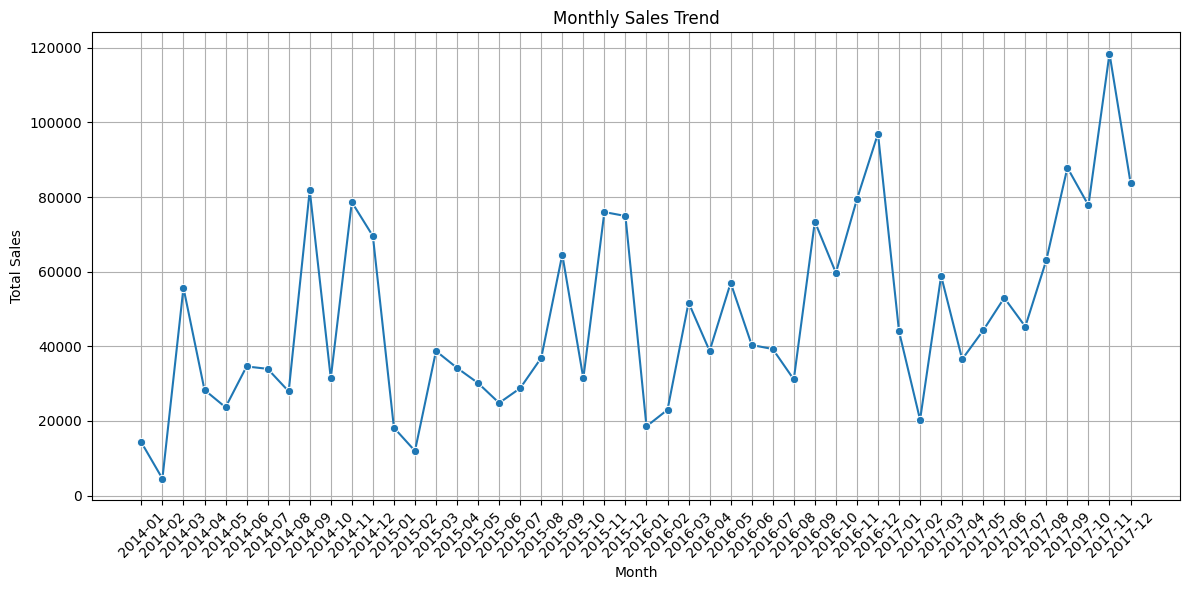

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalSales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Top 10 Products by Sales

<ipython-input-19-e28956a786d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalSales', y='Product Name', palette='coolwarm')


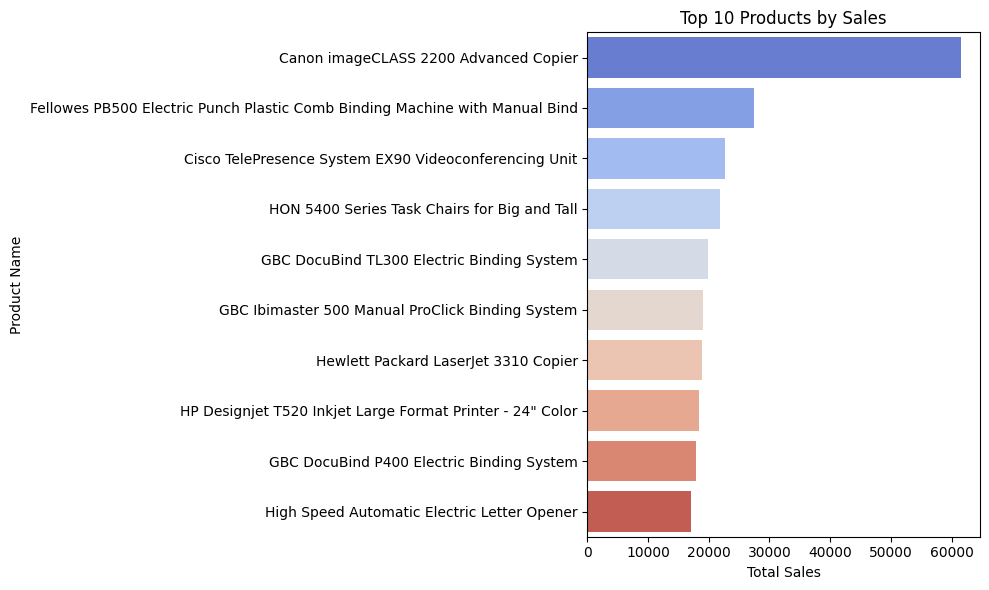

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='TotalSales', y='Product Name', palette='coolwarm')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


# Export Cleaned Data

In [21]:
df.to_csv('Cleaned_Superstore_Data.csv', index=False)
files.download('Cleaned_Superstore_Data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>